# Feature_Engineering_Classification_For_Text & Programming Files

**Author: Santhilata K.V*

**Project Idea:** There are multiple approaches to identify the file format of file opened using a text editor. We followed the text evaluation based approach.
Other approaches considered are applying a series of known compilers. But it is not feasible when the file format is not known and possible number of known file formats are many.

0. This is the third part of the Text-File-Format-Identification project.
1. This code explores sample python programs based on the coding styles, commenting styles and code structures specific to python, Java. Also, unearths features relevant to csv and txt formats
2. Corpus contains list of java files, python files, .txt files, .csv and .tsv files
3. Train the model using Decision tree, kNN classification algorithms and Simple NN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from keras.models import Model
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Dataframe settings
pd.set_option('display.max_colwidth', -1)

Need to change the following path to the data folder as when needed by the user

In [3]:
input_folder = '' # Set path
output_folder = '' #set path

# Feature Engineering #

To do


method definition - proximity with return keyword (no.of defs = no.of returns => python)


Some of the identified key features specific to python are as follows:

* Num_stopwords -> generic stop words are more in text files and less in programming files
* No.of matching key-words in python (numeric) -> This feature holds good for all programming languages
* File extension -> File extension plays a major role in identifying a file 
* Header_info -> for known file types, header and trailer information is important if the file extension is wrongly given
* Trailer_info -> for known file types, header and trailer information is important if the file extension is wrongly provided
* For csv and tsv, no.of newline symbols approximately equals to number of lines in the file. Where as text files can have each sentence extending to multiple lines
* Commenting styles specific to python

    * the symbols such as '#'
    * block comments between a pair of \'\'\', """
    * starting character '@'
* File Structure

    * indentation specific
    * end-of-line markers
    * start-of-line markers (example: python - uses tab spaces)
    * lowercase function and variable names (ex: java and python)
    * how many returns are there for no of defs. If defs==returns => Python else, returns > defs => Java
* brackets are specific to programming language than text files
* if-then-else proximity to be implemented

**Possible python / java extensions** 

In [4]:
# python extensions
python_extensions = ['.py', '.ipynb','.py3','.pyw','.pyx','.pxd','.pxi','.pyi','.pyz','.pywz']
python_bytecode_extensions = ['.pyc', '.pyd','.pyo']
#java_extensions
java_extensions = ['.java']
java_bytecode_extensions = ['.class','.jar','.arj']

#executable file extensions
executable_file_extensions = ['.jar','.class','.apk','.bat', '.bin','.pyc','.egg_info','.pyd','.pyo','.sh']

# text doc extensions are limitless as we can give any extension to a text file 
# that can be opened with a text editor. We use only prominant ones here
text_extensions = ['.txt', '.tsv','.csv'] 


**Keywords**

Import keywords specific to python and java to predict the affliation of the file to python or java.

As expected, this may not be a striking feature. But one of the important ones for classification.

In [5]:
# import python keyword set
import keyword

keywords_python = keyword.kwlist
print(keywords_python)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


Note: As in Python, there is no package for Java key words available. So, I have made mine. Please add if you come across any keywords specific to latest packages in Java etc.

In [6]:
keywords_java = ['abstract',  'assert', 'boolean', 'break', 'byte', 'case', 'try', 'catch', 'char', 
                 'class', 'const', 'continue', 'default', 'do', 'double', 'else', 'enum','extends', 
                 'final' ,'finally', 'float','for', 'goto', 'if', 'implements', 'import', 'instanceof',
                 'int' , 'interface','long', 'native', 'new', 'package', 'private', 'protected', 
                 'public' ,'return', 'short', 'static', 'strictfp', 'super','switch' ,'synchronized',
                 'this', 'throw', 'throws', 'transient', 'void','volatile', 'while' ,'true' ,'false','null' ]

**Packages Information**

Adding the names of the packages to be searched within the text of the file might give crucial information about the text in the file.

In [7]:
# The lists are exhaustive. Need to add more here
common_python_packages = ['numpy','np','pandas', 'pd','matplotlib', 'pyplot','plt','seaborn','sns','os','re','sys']

common_java_packages = ['util','awt','javax','swing','io','text','lang','net','applet']

**Defining Features**

In [8]:
# Feature table as dataset
#file_type is the dependent variable

column_arr = ['file_name','file_extension', 'num_lines',
              'header_info','trailer_info','indentation',
              'eol_marker','sol_marker','isLowercaseMethods',
              'num_stopwords', 'num_Python_keywords','num_Java_keywords',
              'Python_comments','num_Python_comments','Java_comments', 'num_Java_comments', 
              'angular_brackets','curly_brackets','round_brackets','square_brackets', 'num_def','num_returns',
              'if_else_proximity',
              'num_carat', 'num_comma','num_fullstop','num_tab','num_semicolon','num_colon',
              'num_pipe','num_hash', 'average_line_length',
              'description','file_type']
feature_df = pd.DataFrame(columns=column_arr)

print(feature_df.columns)
print(len(feature_df.columns))

Index(['file_name', 'file_extension', 'num_lines', 'header_info',
       'trailer_info', 'indentation', 'eol_marker', 'sol_marker',
       'isLowercaseMethods', 'num_stopwords', 'num_Python_keywords',
       'num_Java_keywords', 'Python_comments', 'num_Python_comments',
       'Java_comments', 'num_Java_comments', 'angular_brackets',
       'curly_brackets', 'round_brackets', 'square_brackets', 'num_def',
       'num_returns', 'if_else_proximity', 'num_carat', 'num_comma',
       'num_fullstop', 'num_tab', 'num_semicolon', 'num_colon', 'num_pipe',
       'num_hash', 'average_line_length', 'description', 'file_type'],
      dtype='object')
34


**Trailer info**

This may not be a feature for this application as, we are looking at the text files containing python / java code

In [9]:
# Trailer info
#TO DO
trailer_info_python = []
trailer_info =[trailer_info_python]

trailer_info_java = []
trailer_info =[trailer_info_java]

**Remove Comments**

In [10]:
# Idea is the given file text should be free from any comments
# 

# Function takes a python script code as input and outputs a list of lines free from comments
# the following code also identifies python commenting style

def remove_comments_fromPythonFiles(file):
    num_lines=0
    num_python_comments = 0
    comment_characters = ['#','@'] # python specific
    comment_words = ['"""','\'\'\''] # python specific
    Python_comments = False
    
    with open(file, 'r') as f:

        lines = [line for line in f.readlines() if line.strip()]
        num_lines = len(lines)
        # block comments
        block_comments =[] 
        i = 0
           
        while (i  < len(lines)):
            if (any(word  in lines[i].split()[0] for word in comment_words)): #line started with comments
                
                l = len(lines[i].split()) 
                
                if (l > 1 and any(word  in lines[i].split()[l-1] for word in comment_words)): # comments ended on the same line
                    block_comments.append(lines[i])
                
                else:
                
                    while (True):  
                        block_comments.append(lines[i])
                        i = i+1
                        
                        l = len(lines[i].split())
                        if (  any(word  in lines[i].split()[l-1] for word in comment_words)):
                            block_comments.append(lines[i])
                            break

            i = i+1        

        #filter block comments
        lines = [line for line  in lines if line not in block_comments]        

        # single_comments
        single_comment_lines = [line for line in lines if ( (line.split()[0] in comment_words) or  (line[0]  in  comment_characters ) ) ]

        # filter single comments
        lines = [line for line  in lines if line not in single_comment_lines]

        # Remove inline comments - when commenting part is continued on the code line
        for i in range(len(lines)):
            if ('#' in lines[i]):
                num_python_comments = num_python_comments+1
                lines[i] = lines[i][0:lines[i].find('#')]
    
        num_python_comments = num_python_comments + len(block_comments) +len(single_comment_lines)
        if num_python_comments >0:
            Python_comments = True
    
    return lines, num_python_comments, Python_comments, num_lines


In [11]:
# utility function to strip inline strings from print statements

def _commentstripper_python(txt, delim, count):
    
    offset = 0
    indx_list = []
    out = ''
        
    while (count > 0):
        
        if (delim in txt):
            
            idx =  txt.index(delim)           
            
            offset = offset+idx
            indx_list.append(offset)
            
            txt = txt[idx+1:]
            count = count-1
   
    
    
    


#file_path ='/home/santhilata/Dropbox/TextFileRecognition/Code/FileSamples/no_extensionFiles/'
#file = 'Class_piano'

def commentstripper_python(file_path,file):
    file = file_path+file
    delim = ('\"')

    with open(file, 'r') as f:
        
        lines = [line for line in f.readlines() if line.strip()]
        i=0

        while (i in range(len(lines))):
            count_delim = lines[i].count(delim)
            if (count_delim%2 ==0 ):
                _commentstripper_python(lines[i],delim, count_delim)

            else:
                while (i+1 < len(lines) and lines[i][len(lines[i])-1] in ['\\','+']): # taking care of multi line joinings
                    line = lines[i].rstrip()+lines[i+1]
                    count_delim = line.count(delim)
                    #print(line)

                    i = i+1
                _commentstripper_python(line,delim, count_delim)
            i = i+1

In [12]:
#java comment stripping
def _commentstripper_java(txt, delim,numcomments):
    'Strips first nest of block comments'
 
    deliml, delimr = delim
    out = ''
    nc  = numcomments
    if deliml in txt:
        numcomments = numcomments+1
        indx = txt.index(deliml)
        out += txt[:indx]
        txt = txt[indx+len(deliml):]
        txt,nc = _commentstripper_java(txt, delim, numcomments)
        assert delimr in txt, 'Cannot find closing comment delimiter in ' + txt
        indx = txt.index(delimr)
        out += txt[(indx+len(delimr)):]
    else:
        out = txt
    return out, nc
 
def commentstripper_java(lines, delim=('/*', '*/')):
    'Strips nests of block comments'
    txt = ''
    for i in range(len(lines)):
        txt = txt + lines[i]
 
    deliml, delimr = delim
    numcomments = 0
    while deliml in txt:
        txt, numcomments = _commentstripper_java(txt, delim,0)
    return txt, numcomments

'''
#unit testing
file_path = '/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/old/JavaFiles/'
file = 'AddNumbers.java'
lines, num_python_comments, Python_comments = remove_comments_fromPythonFiles(file_path+file)

txt, numcomments = commentstripper_java(lines)
print(numcomments)
print(txt)
'''

"\n#unit testing\nfile_path = '/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/old/JavaFiles/'\nfile = 'AddNumbers.java'\nlines, num_python_comments, Python_comments = remove_comments_fromPythonFiles(file_path+file)\n\ntxt, numcomments = commentstripper_java(lines)\nprint(numcomments)\nprint(txt)\n"

In [13]:
# This is to check whether the commenting style is similar to java
# and 
# counting number of java comments
def remove_comments_fromJavaFiles(lines):
    file =[]
    
    Java_comments = False
    
    text, num_java_comments = commentstripper_java(lines)
    line1 = ''
    for line in text:
        
        if (line != '\n'):
            line1 = line1 +line
        else:
            #print(line1)
            file.append(line1+'\n')
            line1 = ''
        
    #print(file)
             
    if num_java_comments > 0:
        Java_comments = True
    
    return file, num_java_comments, Java_comments

#unit testing

'''
file_path = '/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/old/JavaFiles/'
file = 'AddNumbers.java'
lines, num_python_comments, Python_comments = remove_comments_fromPythonFiles(file_path+file)
#print(lines)
file, num_java_comments, Java_comments = remove_comments_fromJavaFiles(lines)

for line in file:
    print(line)

print('================================================================')
print(len(file), num_java_comments, Java_comments)
'''

"\nfile_path = '/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/old/JavaFiles/'\nfile = 'AddNumbers.java'\nlines, num_python_comments, Python_comments = remove_comments_fromPythonFiles(file_path+file)\n#print(lines)\nfile, num_java_comments, Java_comments = remove_comments_fromJavaFiles(lines)\n\nfor line in file:\n    print(line)\n\nprint('================================================================')\nprint(len(file), num_java_comments, Java_comments)\n"

**Stopwords**

Mallet contains more generic words. So using Mallet list

In [14]:
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')


stop_words = []
with open( input_folder+'/malletStopwords.txt','r' ) as f:
    s = str(f.read()).split(' ')
    
for word in s:
    stop_words.append(word)
#stop_words

**Check whether methods start with lowercase**

In [15]:
def isLowercase_Methods(line):
    words = line.split()
    if (words[0] == 'def'):
        if(words[1][0].islower() ):
            isLowercase =True
    elif (words[0] in ['public', 'private', 'protected', 'default']): # Java 
        if(words[2][0].isalpha() and  words[2][0].islower() ):
            isLowercase =True
            
        else:
            isLowercase = False
    return isLowercase

**Find out the File_type**

In [31]:
def getFile_type(file_extension):
    if (file_extension in python_extensions):
        file_type = 'Python'
        description = 'python related file'
    elif (file_extension in java_extensions):
        file_type = 'Java'
        description = 'Java related file'
    elif (file_extension =='no_extension'):
        file_type = 'check this file'
        description = 'Manual entry is needed'
    elif (file_extension in executable_file_extensions):
        file_type= 'ByteCode'
        description = 'byte codes non_ascii characters'
    elif (file_extension == '.txt'):
        file_type = 'Text'
        description = 'Text file'
    
    elif (file_extension == '.csv'):
        file_type = 'CSV'
        description = 'CSV file'
    elif (file_extension == '.tsv'):
        file_type = 'TSV'
        description = 'TSV file'
    elif (file_extension == '.rb'):
        file_type = 'RB'
        description = 'Ruby file'
    else:
        file_type =  'check this file'
        description = 'Manual entry is needed'
    return file_type, description

**function to extract features and add to the dataframe**

In [32]:


def create_features(file_path, file): 
    
    text, num_python_comments, Python_comments, num_total_lines = remove_comments_fromPythonFiles(file_path+file)
    lines, num_java_comments, Java_comments = remove_comments_fromJavaFiles(text) 
    
   
    num_py_keywords = 0
    py_keywords = set()
    num_java_keywords = 0
    java_keywords = set()
    
    num_stopwords = 0
    angular_brackets = 0
    curly_brackets = 0
    round_brackets = 0
    square_brackets = 0
    
    x1=0
    
    num_carats=0
    num_commas=0    
    num_fullstops=0
    
    num_tabs = 0
    num_semicolons = 0
    num_colons =0
    num_pipes = 0
    num_hashs = 0
    average_line_lengths = 0
    
    sol_spaces = 0
    sol_marker = False
    eol_markers_pct = 0.0
    eol_marker = True
    indentation = False
    isLowercaseMethods = False
    
    
    num_def = 0
    num_return = 0
    if_then_else_proximity = 0 
    
    num_lines = 0
    num_words = 0
    indentation_marker_lines =[]
    stopwords_unique = []
    
    # set file_extension
    x = file.split('.')
    file_extension = str('.'+x[len(x)-1] ) if len(x) > 1 else 'no_extension'
       
    file_name = file_path+file   
    
    for line in lines:
        
        # whether line starts with space or tab
        '''
        # The following works only for explicit '\t' marking
        if re.match(r'[\t]', line):
            sol_marker = 'yes'
        '''
             
        sol_spaces = sol_spaces+(len(line) - len(line.lstrip()))
        
        # Whether a line has indentation
        # Line numbers of these code lines will be stored in a list -
        # - to check whether the following lines have similar indentation

        python_keywords_indentation = ['def', 'if','else', 'elif','try','except', 
                                       'finally','for','while', 'with'] # add more appropriate keywords later
        words = line.split() 
        
        #if(any(word  in words[0] for word in python_keywords_indentation)):
        if( len(words) >0 and words[0]  in python_keywords_indentation):
            #print(words[0], 'testing')
            indentation_marker_lines.append(num_lines)

        # EOL character identification
        # whether line ends with any specific character
        # The idea is: if a majority number of lines end with ';' 
        # in a piece of code such as Java, then it is a java code else 
        # it is a non-eol-specific code.  example, Python
        # The following lines count no.of lines and find percentage
        
        if (line.rstrip().endswith(';')):
            eol_markers_pct = eol_markers_pct+1

        # ignore inline strings and count number of python keywords
        #py_keywords as well as java_keywords are sets
        
        #if_flag and else_flags are to measure if-else proximity
        if_flag = False
        else_flag = False
        
        
        for word in words:
            
            num_words += 1
            
            if (word in keywords_python or word in common_python_packages ):
                py_keywords.add(word)
            if (word in keywords_java or word in common_java_packages):
                java_keywords.add(word)
                
            for package in common_python_packages:
                if word in package:
                    py_keywords.add(word)
            for package in common_java_packages:
                if word in package:
                    java_keywords.add(word)
            
            #py_keywords.add(word) if (word in package for package in common_python_packages) else print('does not contain')
            #java_keywords.add(word) if (word in package for package in common_java_packages) else print('does not contain')
        
            # num_stopwords
            if (word in stop_words and word not in stopwords_unique):
                stopwords_unique.append(word)
            
            if '[' in word:
                square_brackets +=1
                
            if '(' in word:
                round_brackets +=1
                
            if '{' in word:
                curly_brackets +=1
                
            if '<' in word:
                angular_brackets += 1  
                
            if word == 'def':
                num_def +=1
                
            if word == 'return':
                num_return +=1
               
            
            if  '.' in word :
                
                num_fullstops += 1
            
            if ',' in word:
                num_commas += 1
            
            if ':' in word:
                num_colons += 1
            
            if '#' in word:
                num_hashs +=1
                
            if ';' in word:
                num_semicolons +=1
                
            if '^' in word:
                num_carats +=1
            
            if '|' in word:
                num_pipes += 1
            
            if '\t' in word:
                num_tabs +=1
                
                
        
        #isLowercaseMethods
        isLowercaseMethods = True if (isLowercaseMethods and isLowercase_Methods(line)) else False
        
        # add code for other language specific keywords later
        num_lines = num_lines+1        
    
    #Average_line_length in words
    average_line_lengths = (num_words*1.0)/num_lines
    
    #num_py_keywords. num_java_keywords
    num_py_keywords = len(py_keywords)
    num_java_keywords = len(java_keywords)
    
    #num_stopwords
    num_stopwords = len(stopwords_unique)
    
    #sol_marker
    sol_marker = (sol_spaces >0 and sol_spaces%4 == 0 ) # assumption: a tab is usually 4 or 8 spaces
    
    #  Now calculate the percentage of lines having eol character
    eol_marker = True if (eol_markers_pct/num_lines * 100 >= 50) else False

    #check for indention
    left_spaces = 0
    for marker in indentation_marker_lines:
        #print(marker, lines[marker], lines[marker+1] )

        lspace_line1 = len(lines[marker]) - len(lines[marker].lstrip())
        lspace_line2 = len(lines[marker+1]) - len(lines[marker+1].lstrip())

        left_spaces = left_spaces + lspace_line2 - lspace_line1

    indentation = True if ((left_spaces>0) and (left_spaces%4 == 0)) else False
    
    #file_type and description automated
    file_type, description = getFile_type(file_extension)
    
    
    df = pd.DataFrame({'file_name':file,
                       'file_extension':file_extension,
                       'num_lines': num_total_lines,
                       'header_info':False,
                       'trailer_info':False,
                       'indentation':indentation,
                       'eol_marker': eol_marker, 
                       'sol_marker': sol_marker,
                       'isLowercaseMethods': isLowercaseMethods, 
                       'num_stopwords':num_stopwords,
                       'num_Python_keywords':num_py_keywords,
                       'num_Java_keywords': num_java_keywords,                     
                       'Python_comments' : Python_comments, 
                       'num_Python_comments': num_python_comments,
                       'Java_comments': Java_comments, 
                       'num_Java_comments': num_java_comments,
                       'angular_brackets': angular_brackets,
                       'curly_brackets': curly_brackets,
                       'round_brackets' : round_brackets,
                       'square_brackets' : square_brackets,
                       'num_def': num_def,
                       'num_returns': num_return,
                       'if_else_proximity' : if_then_else_proximity,
                       'num_carat': num_carats,
                       'num_comma':num_commas,
                       'num_fullstop': num_fullstops,
                       'num_tab': num_tabs,
                       'num_semicolon': num_semicolons,
                       'num_colon':num_colons,
                       'num_pipe':num_pipes,
                       'num_hash':num_hashs,
                       'average_line_length': average_line_lengths,
                       'description': description, 
                       'file_type': file_type
                      }, index =[0])
      
    
    
    return df




'''
#unit testing
file_path = '/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/old/JavaFiles/'
file = 'AddNumbers.java'
lines, num_python_comments, Python_comments,num_lines = remove_comments_fromPythonFiles(file_path+file)
df1 = create_features(file_path,file)
print(df1.num_hash)
'''

0    0
Name: num_hash, dtype: int64


In [33]:

### Read files in the folders of input_folder
def read_trainData(input_folder, feature_df):

    for subdir, dirs, files in os.walk(input_folder):

        for file in files:
            
            
            #set feature -> file_name
            file_name = file 
            
            #set feature -> file_extension
            x = file.split('.')
            file_extension = str('.'+x[len(x)-1] ) if len(x) > 1 else 'no_extension' 
            
            # the file_extension .rb is selected to add selected noise to the data
            if (file_extension in ['.py', '.java','.tsv','.txt','.csv']):
                file_type, description = getFile_type(file_extension)

                # check whether the file has non-ascii characters
                # incase of non-ascii characters, it will throw an exception and should output as byte code

                try:

                    file_path = subdir+'/'

                    df = create_features(file_path, file)

                    feature_df = feature_df.append(df,ignore_index=True, sort=False)                

                except:

                    feature_df = feature_df.append(pd.DataFrame({'file_name':file_name,
                                                                 'file_extension':file_extension,
                                                                 'num_lines':0,
                                                                 'header_info':False,
                                                                 'trailer_info':False,
                                                                 'indentation':False,
                                                                 'eol_marker': False,
                                                                 'sol_marker': False,
                                                                 'isLowercaseMethods': False,
                                                                 'num_stopwords': 0,
                                                                 'num_Python_keywords':0,
                                                                 'num_Java_keywords': 0,                                                              
                                                                 'Python_comments' : False,
                                                                 'num_Python_comments': 0,
                                                                 'Java_comments': False, 
                                                                 'num_Java_comments': 0,
                                                                 'angular_brackets':0,
                                                                 'curly_brackets':0,
                                                                 'round_brackets':0,
                                                                 'square_brackets':0,
                                                                 'num_def':0,
                                                                 'num_returns':0,
                                                                 'if_else_proximity':0,
                                                                 'num_carat':0,
                                                                 'num_comma':0,
                                                                 'num_fullstop':0,
                                                                 'num_tab':0,
                                                                 'num_semicolon':0,
                                                                 'num_colon':0,
                                                                 'num_pipe':0,
                                                                 'num_hash':0,
                                                                 'average_line_length':0,
                                                                 'description': description,
                                                                 'file_type': file_type
                                                                }, 
                                                                index =[0]), ignore_index=True, sort=False)


    
    return feature_df


The following process takes a long time with a huge input size

In [35]:
feature_df = pd.DataFrame(columns=column_arr)

feature_df =read_trainData(input_folder, feature_df)
feature_df.head(10)

,file_name,file_extension,num_lines,header_info,trailer_info,indentation,eol_marker,sol_marker,isLowercaseMethods,num_stopwords,...,num_comma,num_fullstop,num_tab,num_semicolon,num_colon,num_pipe,num_hash,average_line_length,description,file_type
0,malletStopwords.txt,.txt,1,False,False,False,False,False,False,522,...,0,0,0,0,0,0,0,524.000000,Text file,Text
1,requirements_for_tests.txt,.txt,6,False,False,False,False,False,False,0,...,0,6,0,0,0,0,0,1.166667,Text file,Text
2,requirements.txt,.txt,2,False,False,False,False,False,False,0,...,0,2,0,0,0,0,0,1.000000,Text file,Text
3,__init__.py,.py,0,False,False,False,False,False,False,0,...,0,0,0,0,0,0,0,0.000000,python related file,Python
4,spreadsheet_to_json.py,.py,36,False,False,True,False,True,False,8,...,13,11,0,0,10,0,0,2.794118,python related file,Python
5,__init__.py,.py,0,False,False,False,False,False,False,0,...,0,0,0,0,0,0,0,0.000000,python related file,Python
6,__init__.py,.py,0,False,False,False,False,False,False,0,...,0,0,0,0,0,0,0,0.000000,python related file,Python
7,test_list_to_records_conversion.py,.py,46,False,False,True,False,False,False,5,...,36,7,0,0,19,0,0,2.755556,python related file,Python
8,__init__.py,.py,0,False,False,False,False,False,False,0,...,0,0,0,0,0,0,0,0.000000,python related file,Python
9,test_generates_json_from_spreadsheet.py,.py,25,False,False,True,False,False,False,2,...,17,13,0,0,13,0,0,2.920000,python related file,Python


In [36]:
a = len(feature_df[feature_df['num_pipe']>0])
a

1431

In [37]:
feature_df.to_csv(output_folder+'/Only_python_java_tsv_csv_txt.csv', sep=',',index=False)

In [38]:
len(feature_df)

22293

Note: There is a (output_folder+'/InitialData_earlier.csv') file. That contains earlier compiled data for all files in the input_folder. 
'Only_python_java_tsv_csv_txt.csv' contains only python, java, csv, tsv,txt files (the revised target for this project)

# Data Preprocessing

In [5]:
initial_data_df = pd.read_csv(output_folder+'/Only_python_java_tsv_csv_txt.csv')

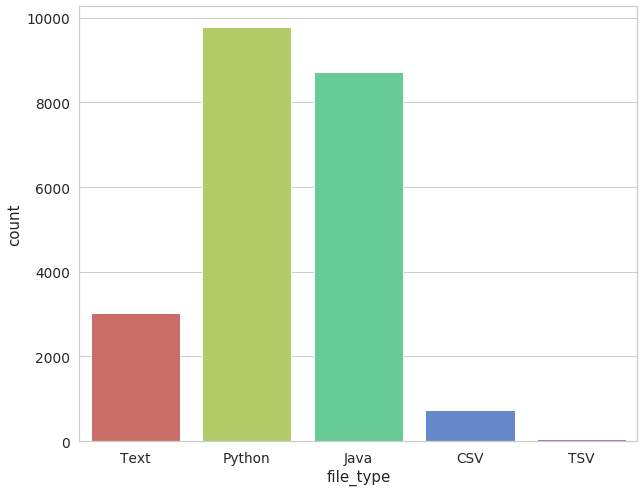

In [6]:
plt.figure(figsize=(10,8))

sns.set(font_scale=1.25, style="whitegrid")
g = sns.countplot("file_type", data=initial_data_df, palette='hls')

In [7]:
programming_source_codes = ['Python','Java']

**Encode to numerical values**

In [8]:
initial_data_df['programming'] =  initial_data_df['file_type'].apply(lambda x: 1 if (x in programming_source_codes  ) else 0)
initial_data_df['eol_marker'] = initial_data_df['eol_marker'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['isLowercaseMethods'] = initial_data_df['isLowercaseMethods'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['header_info'] = initial_data_df['header_info'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['trailer_info'] = initial_data_df['trailer_info'].apply(lambda x: 1 if x==True  else 0)

initial_data_df['indentation'] = initial_data_df['indentation'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['sol_marker'] = initial_data_df['sol_marker'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['Python_comments'] = initial_data_df['Python_comments'].apply(lambda x: 1 if x==True  else 0)
initial_data_df['Java_comments'] = initial_data_df['Java_comments'].apply(lambda x: 1 if x==True  else 0)

**Normalise stopwords, keywords**

Number of keywords and stopwords help to classify text to programming files

In [9]:
#  the mallet stopword list file is also enlisted. So lets remove it
initial_data_df_copy = initial_data_df # backup

initial_data_df = initial_data_df.drop([0],axis=0)


**Different methods of Normalisation**

In [10]:
initial_data_df['stopwords_normalised'] = initial_data_df.apply(lambda row: (row.num_stopwords /(row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords)) if  (row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords)>0 else 0, axis=1)
initial_data_df['Python_keywords'] = initial_data_df.apply(lambda row:( row.num_Python_keywords/(row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords)) if (row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords >0) else 0 , axis=1 )
initial_data_df['Java_keywords'] = initial_data_df.apply(lambda row:( row.num_Java_keywords/(row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords)) if (row.num_stopwords+row.num_Python_keywords +row.num_Java_keywords >0) else 0 , axis=1 )
initial_data_df['num_Python_comments_normalised'] = initial_data_df.apply(lambda row:( row.num_Python_comments/(row.num_Python_comments +row.num_Java_comments)) if (row.num_Python_comments +row.num_Java_comments >0) else 0 , axis=1 )
initial_data_df['num_Java_comments_normalised'] = initial_data_df.apply(lambda row:( row.num_Java_comments/(row.num_Python_comments +row.num_Java_comments)) if (row.num_Python_comments +row.num_Java_comments >0) else 0 , axis=1 )

In [11]:
max_round = max(initial_data_df['round_brackets'])
max_square = max(initial_data_df['square_brackets'])
max_curly = max(initial_data_df['curly_brackets'])
max_angular = max(initial_data_df['angular_brackets'])
initial_data_df['round_normalised'] = initial_data_df['round_brackets'].apply(lambda x: (x*1.0 /max_round) if max_round>0 else 0)
initial_data_df['curly_normalised'] = initial_data_df['curly_brackets'].apply(lambda x: (x*1.0 /max_curly ) if max_curly>0 else 0)
initial_data_df['square_normalised'] = initial_data_df['square_brackets'].apply(lambda x: (x*1.0 /max_square) if max_square>0 else 0)
initial_data_df['angular_normalised'] = initial_data_df['angular_brackets'].apply(lambda x: (x*1.0 /max_angular) if max_angular>0 else 0)

In [12]:
#anomaly :(
max_round = max(initial_data_df['round_brackets']) # =>116318
row = initial_data_df[initial_data_df['round_brackets']==116318]
row

,file_name,file_extension,num_lines,header_info,trailer_info,indentation,eol_marker,sol_marker,isLowercaseMethods,num_stopwords,...,programming,stopwords_normalised,Python_keywords,Java_keywords,num_Python_comments_normalised,num_Java_comments_normalised,round_normalised,curly_normalised,square_normalised,angular_normalised
15945,Downloads from GOV.UK 2017-09-01 - 2018-09-13.csv,.csv,326282,0,0,0,0,0,0,365,...,0,0.735887,0.116935,0.147177,1.0,0.0,1.0,0.000689,0.048941,0.000108


In [13]:
initial_data_df['num_comma'] = initial_data_df.apply(lambda row: row.num_comma*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_tab'] = initial_data_df.apply(lambda row: row.num_tab*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_semicolon'] = initial_data_df.apply(lambda row: row.num_semicolon*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_colon'] = initial_data_df.apply(lambda row: row.num_colon*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_hash'] = initial_data_df.apply(lambda row: row.num_hash*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_carat'] = initial_data_df.apply(lambda row: row.num_carat*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)

initial_data_df['num_pipe'] = initial_data_df.apply(lambda row: row.num_pipe*1.0/(row.num_comma+row.num_tab+row.num_semicolon+
                                                                                         row.num_colon+row.num_hash+row.num_carat+row.num_pipe) if 
                                                    (row.num_comma+row.num_tab+row.num_semicolon+row.num_colon+row.num_hash+row.num_carat+row.num_pipe)>0 else 0, axis=1)


In [14]:
initial_data_df['def_return_balance'] = initial_data_df.apply(lambda row: (row.num_def - row.num_returns ) , axis=1)

In [15]:

print(initial_data_df.columns)
print(len(initial_data_df.columns))

Index(['file_name', 'file_extension', 'num_lines', 'header_info',
       'trailer_info', 'indentation', 'eol_marker', 'sol_marker',
       'isLowercaseMethods', 'num_stopwords', 'num_Python_keywords',
       'num_Java_keywords', 'Python_comments', 'num_Python_comments',
       'Java_comments', 'num_Java_comments', 'angular_brackets',
       'curly_brackets', 'round_brackets', 'square_brackets', 'num_def',
       'num_returns', 'if_else_proximity', 'num_carat', 'num_comma',
       'num_fullstop', 'num_tab', 'num_semicolon', 'num_colon', 'num_pipe',
       'num_hash', 'average_line_length', 'description', 'file_type',
       'programming', 'stopwords_normalised', 'Python_keywords',
       'Java_keywords', 'num_Python_comments_normalised',
       'num_Java_comments_normalised', 'round_normalised', 'curly_normalised',
       'square_normalised', 'angular_normalised', 'def_return_balance'],
      dtype='object')
45


**Drop unwanted columns**

In [16]:
droplist = ['file_name','file_extension','num_stopwords','num_Python_keywords',
            'num_Java_keywords','num_Python_comments','num_Java_comments','description','angular_brackets',
            'curly_brackets','round_brackets', 'square_brackets']
initial_data_df.drop(droplist,axis = 1, inplace=True)

In [17]:

print(initial_data_df.columns)
print(len(initial_data_df.columns))

Index(['num_lines', 'header_info', 'trailer_info', 'indentation', 'eol_marker',
       'sol_marker', 'isLowercaseMethods', 'Python_comments', 'Java_comments',
       'num_def', 'num_returns', 'if_else_proximity', 'num_carat', 'num_comma',
       'num_fullstop', 'num_tab', 'num_semicolon', 'num_colon', 'num_pipe',
       'num_hash', 'average_line_length', 'file_type', 'programming',
       'stopwords_normalised', 'Python_keywords', 'Java_keywords',
       'num_Python_comments_normalised', 'num_Java_comments_normalised',
       'round_normalised', 'curly_normalised', 'square_normalised',
       'angular_normalised', 'def_return_balance'],
      dtype='object')
33


In [18]:
cols = initial_data_df.columns.tolist() # => 33 columns
cols = cols[0:21]+cols[22:]+cols[21:22]

initial_data_df = initial_data_df[cols]
#initial_data_df

In [65]:
initial_data_df.to_csv(output_folder+'/Output_python_java_tsv_csv_txt.csv', sep=',',index=False)
initial_data_df.columns

Index(['num_lines', 'header_info', 'trailer_info', 'indentation', 'eol_marker',
       'sol_marker', 'isLowercaseMethods', 'Python_comments', 'Java_comments',
       'num_def', 'num_returns', 'if_else_proximity', 'num_carat', 'num_comma',
       'num_fullstop', 'num_tab', 'num_semicolon', 'num_colon', 'num_pipe',
       'num_hash', 'average_line_length', 'programming',
       'stopwords_normalised', 'Python_keywords', 'Java_keywords',
       'num_Python_comments_normalised', 'num_Java_comments_normalised',
       'round_normalised', 'curly_normalised', 'square_normalised',
       'angular_normalised', 'def_return_balance', 'file_type'],
      dtype='object')

In [5]:
#initial_data_df = pd.read_csv('/Users/SanthilataKV/Dropbox/TextFileRecognition/Code/FileSamples/outputFiles/Output_python_java_tsv_csv_txt.csv')
initial_data_df = pd.read_csv('/home/santhilata/Dropbox/TextFileRecognition/Code/FileSamples/outputFiles/Output_python_java_tsv_csv_txt.csv')

# Classification Algorithms

In [75]:
X = initial_data_df.iloc[:, :-1].values
y = initial_data_df.loc[:,'file_type'].values

y1 = initial_data_df.loc[:,'file_type'].values

In [76]:
print(y1.shape, X.shape)

(22292,) (22292, 32)


In [77]:
#X = initial_data_df.iloc[:, :-1].values
#y = initial_data_df.loc[:,'file_type'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17833, 32) (4459, 32) (17833,) (4459,)


In [48]:
# No need of scaling

'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''

'\n# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\n'

# Fitting  Decision Tree classifier to the training set

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

**Predicting the Test set results**

In [9]:
y_pred = dt_classifier.predict(X_test)

**Making Confusion matrix**

In [10]:
from sklearn.metrics import confusion_matrix

labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,CSV,Java,Python,TSV,Text
CSV,139,0,0,0,19
Java,0,1734,20,0,0
Python,0,2,1923,0,0
TSV,1,0,0,3,7
Text,10,0,0,4,597


In [74]:
139+19+1734+20+2+1923+1+3+7+10+4+597


4459

In [15]:
y_score = dt_classifier.score(X_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

Accuracy:  0.9858712715855573
Micro-averaged precision score: 0.99
Macro-averaged precision score: 0.82
Per-class precision score: [0.87974684 0.98859749 0.99896104 0.27272727 0.97708674]


In [18]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        CSV       0.93      0.88      0.90       158
       Java       1.00      0.99      0.99      1754
     Python       0.99      1.00      0.99      1925
        TSV       0.43      0.27      0.33        11
       Text       0.96      0.98      0.97       611

avg / total       0.99      0.99      0.99      4459



In [52]:
compare = pd.DataFrame(data ={'y_test': y_test, 'y_pred':y_pred})

In [53]:
compare.to_csv(output_folder+'/predictions_DT.csv')

**Visualisation**

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus

/home/santhilata/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


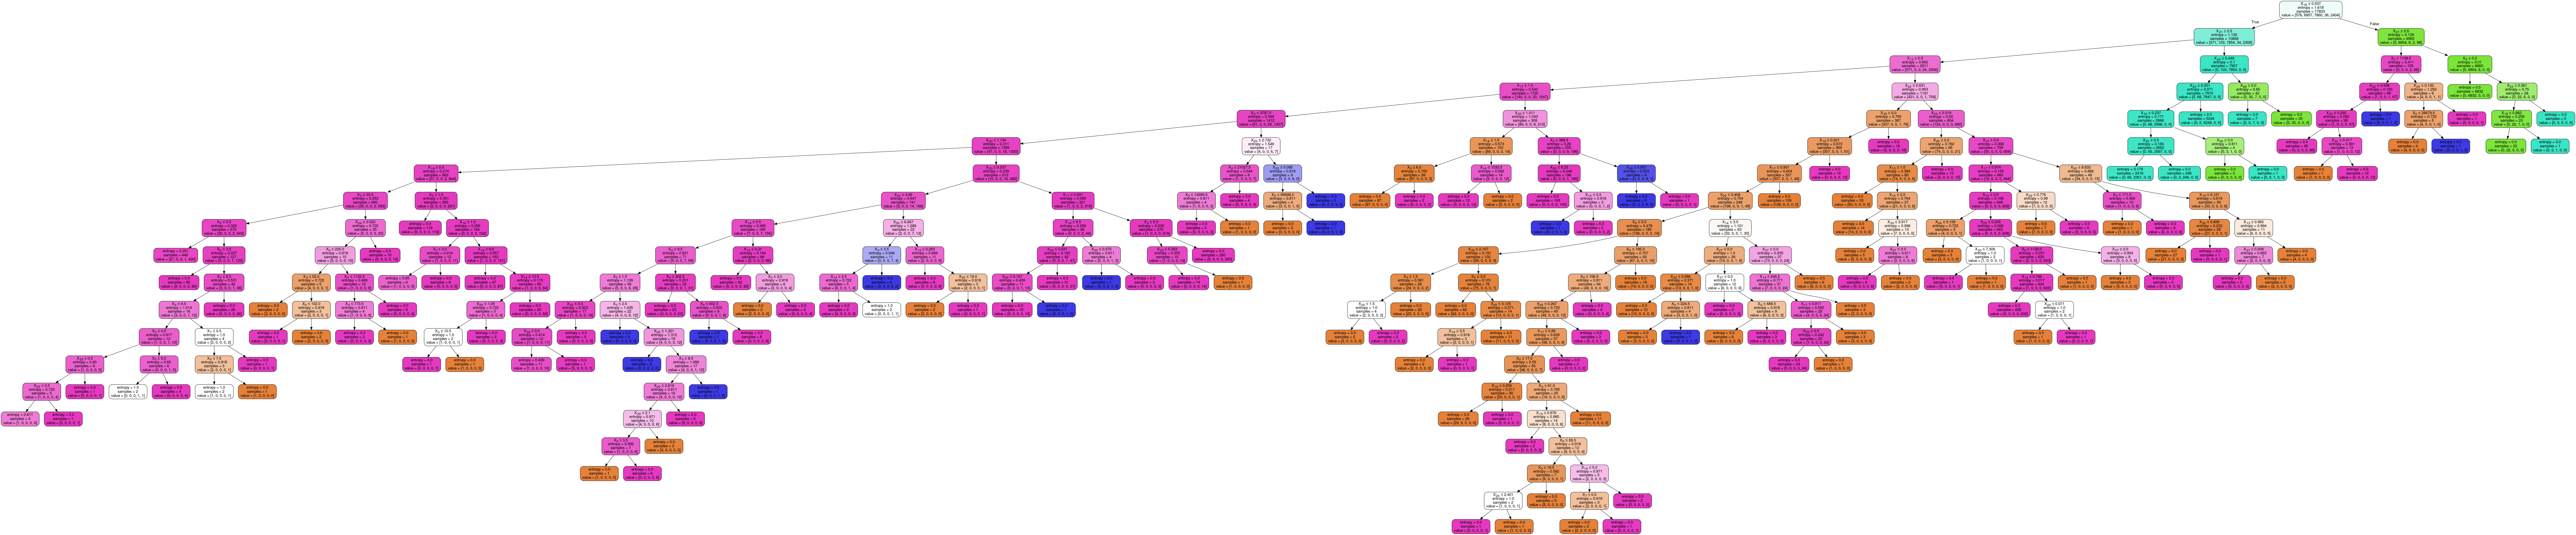

In [29]:
dot_data = StringIO()
export_graphviz(dt_classifier , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# k-Nearest Neighbour model

In [19]:
# Fitting knn to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

,CSV,Java,Python,TSV,Text
CSV,117,5,4,2,30
Java,4,1677,61,0,12
Python,6,54,1852,0,13
TSV,4,0,1,2,4
Text,19,41,24,1,526


In [22]:
cm

array([[ 117,    5,    4,    2,   30],
       [   4, 1677,   61,    0,   12],
       [   6,   54, 1852,    0,   13],
       [   4,    0,    1,    2,    4],
       [  19,   41,   24,    1,  526]])

In [23]:
y_score = knn_classifier.score(X_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)



Accuracy:  0.9360843238394259
Micro-averaged precision score: 0.94
Macro-averaged precision score: 0.74
Per-class precision score: [0.74050633 0.95610034 0.96207792 0.18181818 0.8608838 ]


In [24]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        CSV       0.78      0.74      0.76       158
       Java       0.94      0.96      0.95      1754
     Python       0.95      0.96      0.96      1925
        TSV       0.40      0.18      0.25        11
       Text       0.90      0.86      0.88       611

avg / total       0.93      0.94      0.94      4459



In [34]:
compare = pd.DataFrame(data ={'y_test': y_test, 'y_pred':y_pred})
compare.to_csv(output_folder+'/predictions_Knn.csv')

# SVM

I did not run SVM as it is taking very long time

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear')

svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels = labels)
pd.DataFrame(cm, index = labels, columns = labels)

# Simple Neural Network

In [80]:
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X = initial_data_df.iloc[:, :-1].values
y = initial_data_df.loc[:,'file_type'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

# encode class values as integers
encoder = preprocessing.LabelEncoder()

encoder_y_train = encoder.fit_transform(y_train)
encoder_y_test = encoder.fit_transform(y_test)

dummy_y_train = np_utils.to_categorical(encoder_y_train)
dummy_y_test = np_utils.to_categorical(encoder_y_test)

In [82]:
print(dummy_y_train[100:110] )
print(y_train[100:110]) # [csv, java, py, tsv,txt]

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
['Python' 'Java' 'Python' 'Python' 'Java' 'Python' 'Python' 'Python'
 'Python' 'Java']


In [84]:
print(encoder_y_test[100:110]) # [csv, java, py, tsv,txt]
print(dummy_y_test[100:110])

[2 1 2 1 1 1 1 2 2 1]
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [85]:
from keras.models import Sequential
from keras.utils import to_categorical

# define keras model 
model = Sequential()
model.add(Dense(12, input_dim=32, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(5, activation='softmax'))

#compile the model
model.compile(  optimizer='adam',  loss='categorical_crossentropy',  metrics=['accuracy'])


In [86]:
history = model.fit(X_train, dummy_y_train,validation_data=(X_test, dummy_y_test),  epochs=30,  batch_size=20,)
# fit model

Train on 17833 samples, validate on 4459 samples
Epoch 1/30
17833/17833 [==============================] - 1s 74us/step - loss: 0.7086 - acc: 0.8473 - val_loss: 0.4752 - val_acc: 0.9134
Epoch 2/30
17833/17833 [==============================] - 1s 60us/step - loss: 0.3806 - acc: 0.9350 - val_loss: 0.2654 - val_acc: 0.9477
Epoch 3/30
17833/17833 [==============================] - 1s 62us/step - loss: 0.2794 - acc: 0.9488 - val_loss: 0.2595 - val_acc: 0.9511
Epoch 4/30
17833/17833 [==============================] - 1s 63us/step - loss: 0.3021 - acc: 0.9456 - val_loss: 0.4489 - val_acc: 0.9199
Epoch 5/30
17833/17833 [==============================] - 1s 60us/step - loss: 0.2329 - acc: 0.9528 - val_loss: 0.3678 - val_acc: 0.9377
Epoch 6/30
17833/17833 [==============================] - 1s 61us/step - loss: 0.2575 - acc: 0.9524 - val_loss: 0.7227 - val_acc: 0.9015
Epoch 7/30
17833/17833 [==============================] - 1s 63us/step - loss: 0.2208 - acc: 0.9540 - val_loss: 0.1525 - val_acc:

In [87]:
# evaluate the keras model
test_loss, test_accuracy = model.evaluate(X_test,dummy_y_test )
print('Test loss and accuracy')
print('loss:%.2f'%test_loss, 'Accuracy: %.2f' % (test_accuracy*100))

# evaluate the model for train set
train_loss, train_acc = model.evaluate(X_train, dummy_y_train, verbose=0)
print('Train loss and accuracy')
print('loss:%.2f'%train_loss, 'Accuracy: %.2f' % (train_acc*100))

4459/4459 [==============================] - 0s 12us/step
Test loss and accuracy
loss:0.15 Accuracy: 97.38
Train loss and accuracy
loss:0.13 Accuracy: 97.80


In [89]:
#model.save_weights('/Users/SanthilataKV/Dropbox/TextFileRecognition/Code/FileSamples/outputFiles/'+'model.h5')
model.save_weights('/home/santhilata/Dropbox/TextFileRecognition/Code/FileSamples/outputFiles/'+'model.h5')

In [90]:
predictions = model.predict(X_test)

In [92]:
print(len(predictions))
print(predictions)
print('predictions[3010]: ',predictions[3010])

4459
[[4.7586320e-04 3.4825556e-02 9.6469617e-01 1.0535521e-12 2.4299520e-06]
 [1.8723808e-26 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.7586320e-04 3.4825556e-02 9.6469617e-01 1.0535521e-12 2.4299520e-06]
 ...
 [1.5813767e-09 9.9999881e-01 1.1404202e-06 5.2116345e-14 2.7107314e-10]
 [4.7586320e-04 3.4825556e-02 9.6469617e-01 1.0535521e-12 2.4299520e-06]
 [4.1894674e-09 9.9999535e-01 4.6120267e-06 5.6869067e-14 6.1904709e-10]]
predictions[3010]:  [9.7062767e-01 1.5194228e-04 5.5001467e-03 1.6725299e-07 2.3719994e-02]


In [93]:
np.argmax(predictions[3010])

0

In [94]:
y_test[3010]

'CSV'

**Draw dt/knn/nn success train and test for various test train combinations**

**Draw comparisions for vaious test accuracies vs neurons & layers for various dropouts**

Draw best features and worst features

**Normalised confusion matrix or heatmap of features**

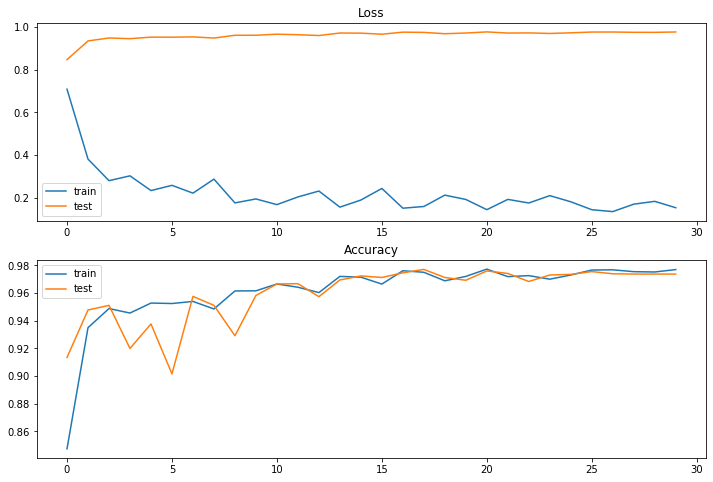

In [95]:
plt.figure(figsize=(12,8))
# plot loss during training
plt.subplot(211)
plt.title('Loss')

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['acc'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [98]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
print(y_test)


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(encoder_y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(encoder_y_test, yhat_classes, average=None)
print( 'precision: ', precision)

precision_micro = precision_score(encoder_y_test, yhat_classes, average='micro')
print( 'precision_micro: %f' %precision_micro)

precision_macro = precision_score(encoder_y_test, yhat_classes, average='macro')
print( 'precision_macro: %f' %precision_macro)

precision_weighted = precision_score(encoder_y_test, yhat_classes, average='weighted')
print( 'precision_weighted: %f' %precision_weighted)


# recall: tp / (tp + fn)
recall = recall_score(encoder_y_test, yhat_classes , average=None)
print('Recall: ' , recall)

recall_macro = recall_score(encoder_y_test, yhat_classes , average='macro')
print('Recall_macro: %f' %recall_macro)

recall_micro = recall_score(encoder_y_test, yhat_classes , average='micro')
print('Recall_micro: %f' % recall_micro)

recall_weighted = recall_score(encoder_y_test, yhat_classes , average='weighted')
print('Recall_weighted: %f' % recall_weighted)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(encoder_y_test, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(encoder_y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC => apparently has multiclass support failure
#auc = roc_auc_score(encoded_y[:18000], yhat_probs, average="weighted")
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(encoder_y_test, yhat_classes)
print(matrix)

[2 2 2 ... 1 2 1]
['Python' 'Python' 'Python' ... 'Java' 'Python' 'Java']
Accuracy: 0.973761
precision:  [0.81021898 0.99712147 0.98163265 0.         0.92      ]
precision_micro: 0.973761
precision_macro: 0.741795
precision_weighted: 0.970785
Recall:  [0.70253165 0.98745724 0.99948052 0.         0.9410802 ]
Recall_macro: 0.726110
Recall_micro: 0.973761
Recall_weighted: 0.973761
F1 score: 0.972077
Cohens kappa: 0.958789
[[ 111    0    4    0   43]
 [   0 1732   22    0    0]
 [   0    1 1924    0    0]
 [   0    1    3    0    7]
 [  26    3    7    0  575]]


/home/santhilata/anaconda3/envs/tf36/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/santhilata/anaconda3/envs/tf36/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

print(yhat_probs)

[[5.1032749e-14 9.9999535e-01 4.6115779e-06 3.0578003e-19 1.0822408e-08]
 [1.2781287e-19 9.9999583e-01 4.2147785e-06 2.7840682e-24 3.2064431e-12]
 [2.6163383e-32 1.0000000e+00 1.0166662e-08 0.0000000e+00 5.7382759e-21]
 ...
 [2.3439847e-10 1.4514853e-17 9.9998021e-01 0.0000000e+00 1.9792838e-05]
 [3.2339722e-02 3.3569190e-04 5.9916306e-04 2.3747650e-03 9.6435070e-01]
 [3.2339722e-02 3.3569190e-04 5.9916306e-04 2.3747650e-03 9.6435070e-01]]


In [100]:
matrix = confusion_matrix(encoder_y_test, yhat_classes)
print(matrix)
labels = np.unique(y_test)
pd.DataFrame(matrix, index = labels, columns = labels)

[[ 111    0    4    0   43]
 [   0 1732   22    0    0]
 [   0    1 1924    0    0]
 [   0    1    3    0    7]
 [  26    3    7    0  575]]


,CSV,Java,Python,TSV,Text
CSV,111,0,4,0,43
Java,0,1732,22,0,0
Python,0,1,1924,0,0
TSV,0,1,3,0,7
Text,26,3,7,0,575


In [101]:
from sklearn.metrics import classification_report
print (classification_report(encoder_y_test, yhat_classes))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       158
           1       1.00      0.99      0.99      1754
           2       0.98      1.00      0.99      1925
           3       0.00      0.00      0.00        11
           4       0.92      0.94      0.93       611

    accuracy                           0.97      4459
   macro avg       0.74      0.73      0.73      4459
weighted avg       0.97      0.97      0.97      4459



/home/santhilata/anaconda3/envs/tf36/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
